In [33]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

def property(T):
        Tf = (T+300)/2
        density = 1.1614 + (Tf-300)/(350-300)*(0.995-1.1614)
        viscosity = (184.6 + (Tf-300)/(350-300)*(208.2-184.6))*10**-7
        conductivity = (26.3 + (Tf-300)/(350-300)*(30.0-26.3))*10**-3
        Pr = (0.707 + (Tf-300)/(350-300)*(0.70-0.707))
        Pr_s = 0.707
        return(density,viscosity,conductivity,Pr, Pr_s)

def zuka(Re_num):
    Re = Re_num
    if (Re<=40):       
        C = 0.75 
        m = 0.4
        n = 0.33
    elif (Re<=1000):       
        C = 0.51 
        m = 0.5
        n = 0.33
    elif (Re<=200000):       
        C = 0.26
        m = 0.6
        n = 0.33
    else:       
        C = 0.076
        m = 0.7
        n = 0.33
    return (C,m,n)

I, k,C,m,n,Pr,Prs,A,s,l,Ts, Too = sp.symbols("I, k,C,m,n,Pr,Pr_s,A,s,l,T_s, T_oo")
Re, rho, d, mu, v = sp.symbols("Re, rho, d, mu, v")
dI, dv = sp.symbols("dI, dv")
Q1, Q2 = sp.symbols("Q_1, Q_2")
Err = sp.Symbol("Err")

eq_sensitivity = sp.Eq(I,2*v/m*dI/dv)
eq_Re = sp.Eq(Re,rho*v*d/mu)
eq_Q1 = sp.Eq(Q1, I**2*s*l/(sp.pi/4*d**2))
eq_Q2 = sp.Eq(Q2, (k/d)*C*(Re**m)*(Pr**n)*((Pr/Prs)**(1/4))*(sp.pi*d*l)*(Ts-Too))

l_num = 0.01
s_num = 10.6 * 10**-8
Too_num = 300



In [34]:
v_max = 50
I_max = 0.2

values_1 = {v:v_max,I:I_max,dI:10*10**-6,dv:0.01}       
m_min = round(sp.solve(eq_sensitivity.subs(values_1), m)[0],1)

m_Re = 0
Re_min = 0

while m_Re < m_min:
    z = zuka(Re_min)[1]
    m_Re = z
    Re_min += 1
Re_min -= 1

print(Re_min)

41


In [35]:
min_diameters = []

for Temp in range(312,327):
    prop = property(Temp)
    values = {Re:Re_min, rho:prop[0],v:v_max, mu:prop[1]}
    d_min = sp.solve(eq_Re.subs(values),d)
    min_diameters.append(d_min[0]*10**6)
    
d_min = int(round(max(min_diameters)))
print(d_min)

14


In [36]:
temp_acc = 0.1
dia_acc = 0.1

values_1 = {v:v_max, I:I_max, l:l_num,s:s_num, Too:Too_num, sp.pi:np.pi}

Error = 10**10
diameter = 0
temperature = 0

T_step = int((327-312)/temp_acc)
d_step = int((50-d_min+1)/dia_acc)


for temp in np.linspace(313,327,T_step):
    prop = property(temp)
    values_2 = {k:prop[2], mu:prop[1], rho: prop[0], Pr:prop[3], Prs:prop[4]}
    for dia in np.linspace(d_min,50,d_step):
        dia = dia * 10**-6
        Re_num = prop[0]*v_max*dia/prop[1]
        z = zuka(Re_num)
        values_3 = {C:z[0], m:z[1], n:z[2], Re:Re_num, Ts:temp, d:dia}
        Error_temp = abs((eq_Q1.rhs - eq_Q2.rhs).subs(values_1).subs(values_2).subs(values_3))
        if Error_temp< Error:
            diameter = dia
            temperature = temp
            Error = Error_temp

print("diameter = ", end="")
print(diameter*10**6) 
print("Temperature = ", end="")
print(temperature)
print("Error = ", end="")
print(Error)


In [ ]:
equation = sp.Eq(eq_Q1.rhs,eq_Q2.rhs)

prop = property(temperature)
values_1 = {l:l_num,s:s_num, Too:Too_num, sp.pi:np.pi,k:prop[2],d:diameter, Ts:temperature, Pr:prop[3],Prs:prop[4]}
eq_1 = equation.subs(values_1)

x = [i for i in range(1,51)]
y = []
print(x)

for v in x:
    Re_num = prop[0]*v*diameter/prop[1]
    z = zuka(Re_num)
    values_2 = {Re:Re_num, C:z[0],m:z[1],n:z[2]}
    i = sp.solve(eq_1.subs(values_2),I)
    y.append(i[1])

print(y)


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
[0.0894051843654902, 0.102699588208845, 0.111374804326121, 0.117970848034373, 0.123354984757475, 0.127936054517531, 0.131941771594003, 0.135512919074690, 0.138743039642673, 0.141697668071596, 0.144424622192761, 0.146959935369099, 0.149331481448552, 0.151561295985426, 0.153667121068187, 0.155663467221943, 0.157562363712690, 0.159373901404826, 0.161106633721292, 0.162767878220758, 0.164363947102334, 0.165900325933893, 0.167381814031524, 0.168812636008955, 0.170196531358985, 0.171536827089222, 0.171438649697563, 0.173004461976679, 0.174528877645503, 0.176014363729875, 0.177463163804280, 0.178877324713494, 0.180258719371254, 0.181609066312286, 0.182929946541136, 0.184222818117430, 0.185489028835621, 0.186729827292512, 0.187946372584276, 0.189139742833176, 0.190310942710766, 0.191460910097073, 0.192590

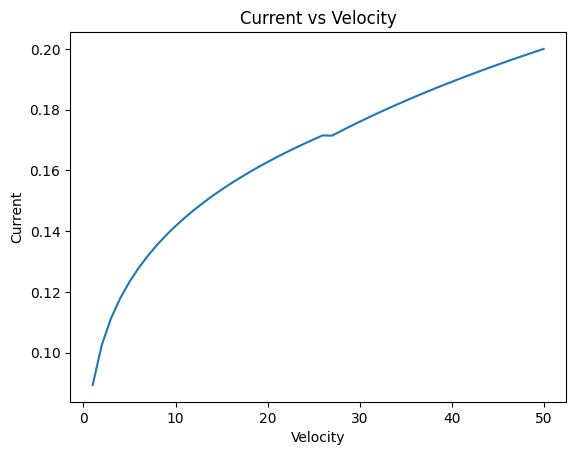

In [ ]:
plt.plot(x, y)

plt.title('Current vs Velocity')
plt.xlabel('Velocity')
plt.ylabel('Current')

plt.show()